## Transformer aplicado a IMDB para clasificacion

Autores :   
- Pablo Gonzalez  
- Araceli Sanchez
  
Fecha : 4/10/2025

In [ ]:
#Importamos las librerias necesarias
import sys
sys.path.append("../src") 
import models, data, utils, train
import importlib
importlib.reload(models)
importlib.reload(data)
importlib.reload(utils)
importlib.reload(train)
from data import get_imdb_data
from models import PositionalEmbedding, TransformerEncoder, build_transformer_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
X_train, y_train, X_test, y_test = get_imdb_data(num_words=10000)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [15]:
print(len(X_train[0]))
print(len(X_train[23000]))

218
83


Realizamos el padding de secuencias para que tengan la misma longitud

In [16]:
maxlen = 200
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [17]:
print(len(X_train[0]))
print(len(X_train[23000]))

200
200


In [18]:
vocab_size = 10000 #usamos el mismo tamanho que max words
sequence_length =maxlen 
embed_dim = 128
num_heads = 8 #nro de cabezas de atencion
dense_dim = 256 #dimension de la capa densa en el bloque transformer

model = build_transformer_model(vocab_size, sequence_length, embed_dim, num_heads, dense_dim)

c:\Users\pgsan\OneDrive\Desktop\AprendizajeProfundo\project-ml-portfolio\portfolio\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'transformer_encoder' (of type TransformerEncoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, None, 128) │  1,305,600 │ input_layer[0][0] │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None)      │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encoder │ (None, None, 128) │    593,920 │ positional_embed… │
│ (TransformerEncode… │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ transformer_enco… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │        129 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,899,649 (7.25 MB)

 Trainable params: 1,899,649 (7.25 MB)

 Non-trainable params: 0 (0.00 B)

Entrenamos el modelo

In [19]:
history = model.fit(X_train,y_train,epochs=3,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 685s 860ms/step - accuracy: 0.7938 - loss: 0.4233 - val_accuracy: 0.8765 - val_loss: 0.2933
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 668s 855ms/step - accuracy: 0.9115 - loss: 0.2280 - val_accuracy: 0.8413 - val_loss: 0.4016
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 673s 861ms/step - accuracy: 0.9328 - loss: 0.1729 - val_accuracy: 0.8634 - val_loss: 0.3427


Graficamos la precision y perdida de entrenamiento y validacion

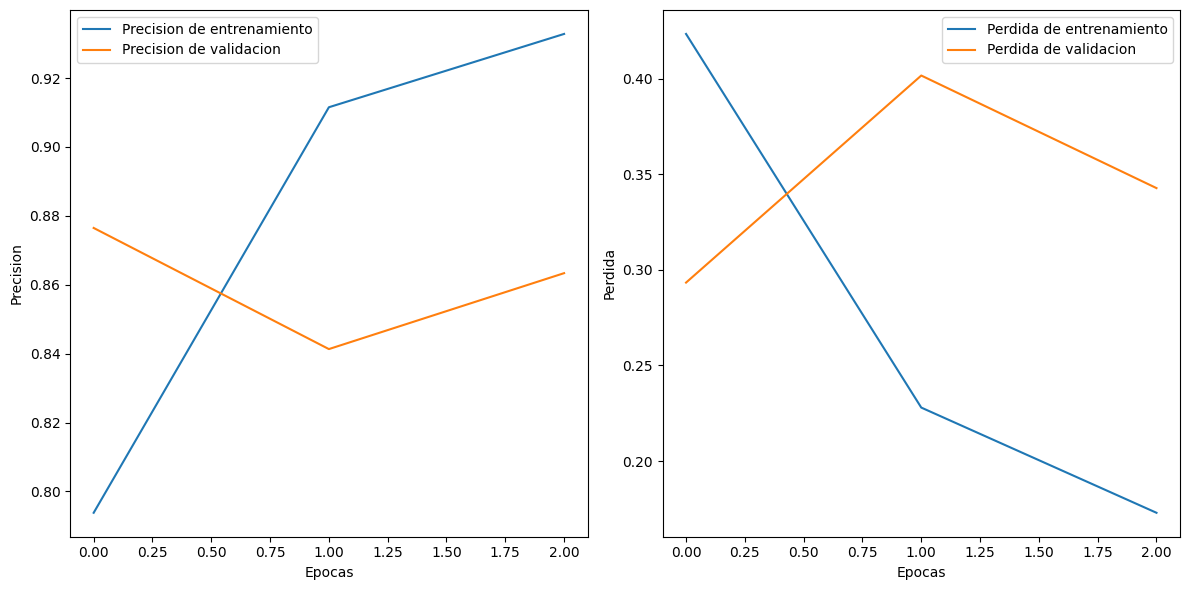

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Precision de entrenamiento')
plt.plot(history.history['val_accuracy'],label='Precision de validacion')
plt.xlabel('Epocas')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Perdida de entrenamiento')
plt.plot(history.history['val_loss'],label='Perdida de validacion')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.tight_layout()
plt.show()

Evaluacion del modelo

In [21]:
loss_train, accuracy_train = model.evaluate(X_train,y_train)
print(f"Perdida entrenamiento: {loss_train}")
print(f"Precision entrenamiento: {accuracy_train}")

loss, accuracy = model.evaluate(X_test,y_test)
print(f"Perdida validacion: {loss}")
print(f"Precision validacion: {accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 161s 205ms/step - accuracy: 0.9692 - loss: 0.1003
Perdida entrenamiento: 0.10030640661716461
Precision entrenamiento: 0.9692000150680542
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 207ms/step - accuracy: 0.8634 - loss: 0.3427
Perdida validacion: 0.3427058160305023
Precision validacion: 0.8633599877357483


Evaluamos el modelo con la matriz de confusion

c:\Users\pgsan\OneDrive\Desktop\AprendizajeProfundo\project-ml-portfolio\portfolio\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'transformer_encoder' (of type TransformerEncoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 210ms/step


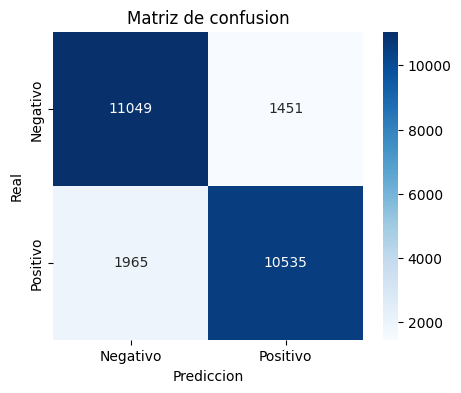

              precision    recall  f1-score   support

    Negativo       0.85      0.88      0.87     12500
    Positivo       0.88      0.84      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [22]:
y_pred_probs= model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
ax = sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
ax.set_xticklabels(['Negativo','Positivo'])
ax.set_yticklabels(['Negativo','Positivo'])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de confusion')
plt.show()
print(classification_report(y_test,y_pred,target_names=['Negativo','Positivo']))


Resultados de algunas predicciones

In [31]:
from keras.datasets import imdb
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

#decodificamos una reseña
def decode_review(encoded_review):
  return " ".join([reverse_word_index.get(i-3,'?') for i in encoded_review])

#Ejemplo mostramos 5 reviews

for i in range(25,30):
  print(f"Reseña original: {decode_review(X_test[i])}")
  print("Etiqueta real: ","Positivo" if y_test[i]==1 else "Negativo")
  print("Prediccion modelo:", "Positivo " if y_pred[i]==1 else "Negativo")

Reseña original: for a broken car part the town is creepy and i'm just gonna stop there because thats when the truly gruesome mayhem begins trust me when i say if your looking for a horror film go see this you will love it it's wonderfully diabolical and inventive with it's killing scenes the story is interesting and the characters are ? drawn with the actors giving them ? of personality paris hilton included whom does quite well with her part the film lies a little on the shallow side but it's so much fun and who cares this movie should eat up the box office and all horror fans should have part in it go see house of wax the film that features skin being ? super glued lips dead animal ? hot wax ? on a still living person a finger being cut off a ? a pole through the head and much more i was lucky enough to witness this film at the ? premiere and all the actors were on hand to promote the film and boy do they have something to be proud of house of wax is the scariest roller ride of the 

Conclusion

El modelo Transformer entrenado durante 3 épocas muestra una muy buena capacidad de aprendizaje, se comporta bastante bien en las predicciones, en el conjunto de entrenamiento, alcanzando una precisión de 96.9% y una pérdida muy baja (0.10).
En el conjunto de validación, la precisión es de 86.3% y la pérdida es mayor (0.34), lo que indica que el modelo generaliza bien pero existe una ligera diferencia respecto al entrenamiento, posiblemente por sobreajuste inicial.
En resumen, el modelo logra una muy buena clasificación de sentimientos en IMDB, aunque podría beneficiarse de técnicas de regularización o más datos para mejorar la generalización. Tambien se podria aumentar las epocas para ver si mejora la precision en validacion.

In [ ]:
#guardamos el modelo en results/transformer/ para su reutilizacion
import os
out_dir = '../results/transformer/'
filename = os.path.join(out_dir, f'transformer_model.keras')
model.save(filename)